### EDA
1. Descriptive Statistics
2. Missing Values
3. Distribution
4. Correlations

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
df_train = pd.read_csv("../data/train.csv")
df_test = pd.read_csv("../data/test.csv")

#### Features:
1. PassengerId: xxxx_xx may be able to seperate according to the group number
2. HomePlanet: three levels (Europa, Earth and Mars), missing value exists (maybe fill them by the most common planet)
3. CryoSleep: True False and missing value (fill with group? or most common choice)
4. Cabin: deck/number/side, side(P or S) may be separated?
5. Destination: 3 levels, missing value exists (by group or by most common choice)
6. Age: NUMERIC, mean 28.8, sd=14.5, 0~79, missing value
7. VIP: True False, missing values
8. RoomService, FoodCourt, ShoppingMall, Spa, VRDeck: NUMERIC, statistics as above
9. Name: all unique cannot encoded and have missing value, may not include 
9. Transported: label

In [5]:
print(df_train.columns)
print(df_test.columns)
print(df_train.head(3))

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')
Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name'],
      dtype='object')
  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck             Name  \
0          0.0        0.0           0.0     0.0     0.0  Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0     Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0    Altark Susent   

   Transp

In [6]:
print(df_train.shape)
print(df_test.shape)
print(df_train.HomePlanet.unique())
print(df_train.CryoSleep.unique())
print(df_train.Destination.unique())
print(df_train.VIP.unique())
print(df_train.Transported.unique())
print(df_test.HomePlanet.unique())
print(df_test.CryoSleep.unique())
print(df_test.Destination.unique())
print(df_test.VIP.unique())

(8693, 14)
(4277, 13)
['Europa' 'Earth' 'Mars' nan]
[False True nan]
['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
[False True nan]
[False  True]
['Earth' 'Europa' 'Mars' nan]
[True False nan]
['TRAPPIST-1e' '55 Cancri e' 'PSO J318.5-22' nan]
[False nan True]


In [7]:
print(df_train.describe())

               Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      38.000000     47.000000     76.000000     27.000000     59.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count   8505.000000  
mean     304.854791  
std     1145.717189  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       46.000000  
max    24133.000000  


In [8]:
print(df_test.describe())

               Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  4186.000000   4195.000000   4171.000000   4179.000000   4176.000000   
mean     28.658146    219.266269    439.484296    177.295525    303.052443   
std      14.179072    607.011289   1527.663045    560.821123   1117.186015   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      26.000000      0.000000      0.000000      0.000000      0.000000   
75%      37.000000     53.000000     78.000000     33.000000     50.000000   
max      79.000000  11567.000000  25273.000000   8292.000000  19844.000000   

             VRDeck  
count   4197.000000  
mean     310.710031  
std     1246.994742  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       36.000000  
max    22272.000000  


#### Missing Values
1. HomePlanet: filled by earth
2. Destination: filled by most
3. 

In [9]:
#train data
na_count = df_train.isna().sum()
na_proportion = na_count/len(df_train)
print(na_count)
print(na_proportion)

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64
PassengerId     0.000000
HomePlanet      0.023122
CryoSleep       0.024963
Cabin           0.022892
Destination     0.020936
Age             0.020591
VIP             0.023352
RoomService     0.020821
FoodCourt       0.021051
ShoppingMall    0.023927
Spa             0.021051
VRDeck          0.021627
Name            0.023007
Transported     0.000000
dtype: float64


In [10]:
#test data
na_count = df_test.isna().sum()
na_proportion = na_count/len(df_test)
print(na_count)
print(na_proportion)

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64
PassengerId     0.000000
HomePlanet      0.020341
CryoSleep       0.021744
Cabin           0.023381
Destination     0.021510
Age             0.021277
VIP             0.021744
RoomService     0.019172
FoodCourt       0.024784
ShoppingMall    0.022913
Spa             0.023615
VRDeck          0.018705
Name            0.021978
dtype: float64


#### Distributions

##### Home Planet
1. Home Planet proportion
similar in test and train
2. Home Planet vs Transported proportion

Text(0.5, 1.0, 'Percent of data belonging to each home planet')

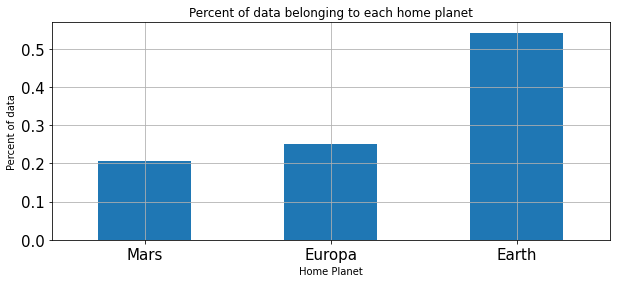

In [11]:
df_train['HomePlanet'].value_counts(normalize=True).sort_values().plot(kind='bar',figsize=(10,4),rot=0)
plt.xlabel("Home Planet")
plt.ylabel("Percent of data")
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.title("Percent of data belonging to each home planet")

Text(0.5, 1.0, 'Percent of data belonging to each home planet')

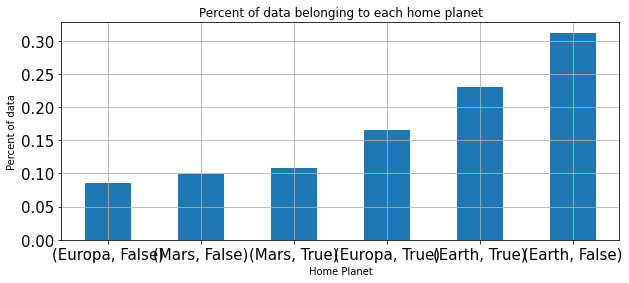

In [12]:
df_train[['HomePlanet','Transported']].value_counts(normalize=True).sort_values().plot(kind='bar',figsize=(10,4),rot=0)
plt.xlabel("Home Planet")
plt.ylabel("Percent of data")
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.title("Percent of data belonging to each home planet")

Text(0.5, 1.0, 'Percent of data belonging to each home planet')

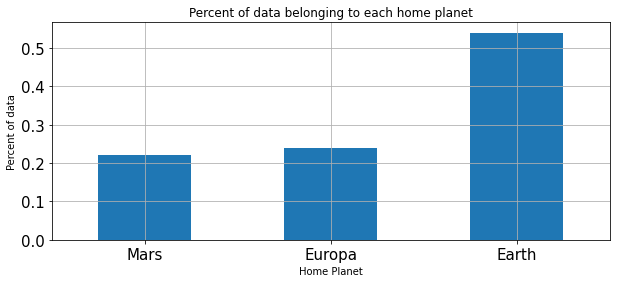

In [13]:
df_test['HomePlanet'].value_counts(normalize=True).sort_values().plot(kind='bar',figsize=(10,4),rot=0)
plt.xlabel("Home Planet")
plt.ylabel("Percent of data")
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.title("Percent of data belonging to each home planet")

Earth > Europa > Mars
Mostly from Earth and not-transported, Then Transported then other untransported

##### Destination
1. Destination proportion
similar in test and train
2. Destination vs Transported

Text(0.5, 1.0, 'Percent of data belonging to each Destination')

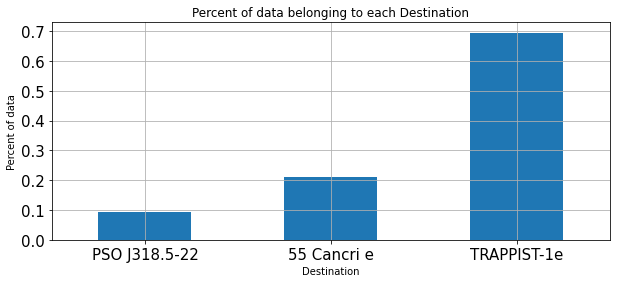

In [14]:
df_train['Destination'].value_counts(normalize=True).sort_values().plot(kind='bar',figsize=(10,4),rot=0)
plt.xlabel("Destination")
plt.ylabel("Percent of data")
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.title("Percent of data belonging to each Destination")

Text(0.5, 1.0, 'Percent of data belonging to each Destination')

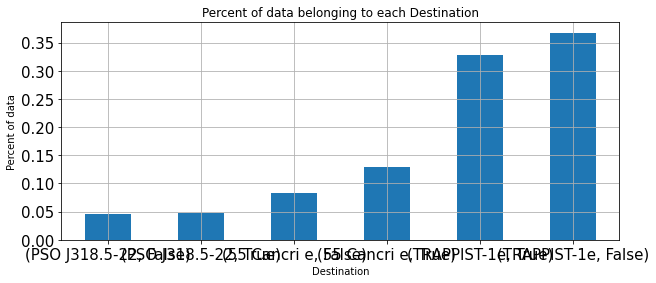

In [15]:
df_train[['Destination','Transported']].value_counts(normalize=True).sort_values().plot(kind='bar',figsize=(10,4),rot=0)
plt.xlabel("Destination")
plt.ylabel("Percent of data")
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.title("Percent of data belonging to each Destination")

T>55>P, the transported distributed quite uniformly within each destination

Text(0.5, 1.0, 'Percent of data belonging to each Destination')

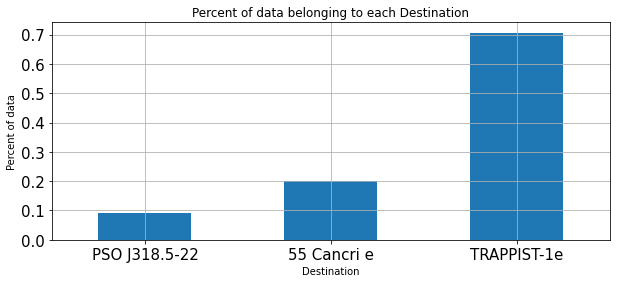

In [16]:
df_test['Destination'].value_counts(normalize=True).sort_values().plot(kind='bar',figsize=(10,4),rot=0)
plt.xlabel("Destination")
plt.ylabel("Percent of data")
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.title("Percent of data belonging to each Destination")

##### Age 
1. Age distribution
mostly 20-40, then 0-20 then 40-60 then 60-80
2. Age vs Transported
The distribution of Age in label doesn't have much difference

(array([2158., 4497., 1605.,  254.]),
 array([ 0.  , 19.75, 39.5 , 59.25, 79.  ]),
 <BarContainer object of 4 artists>)

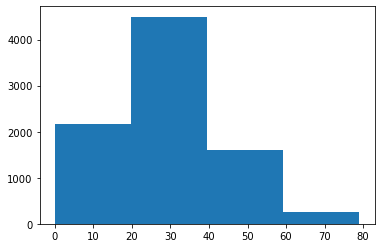

In [17]:
plt.hist(df_train["Age"],bins=4)

(array([ 395.,  196.,  174.,  475.,  918., 1171., 1094.,  882.,  696.,
         654.,  504.,  389.,  288.,  248.,  176.,  118.,   72.,   34.,
          20.,   10.]),
 array([ 0.  ,  3.95,  7.9 , 11.85, 15.8 , 19.75, 23.7 , 27.65, 31.6 ,
        35.55, 39.5 , 43.45, 47.4 , 51.35, 55.3 , 59.25, 63.2 , 67.15,
        71.1 , 75.05, 79.  ]),
 <BarContainer object of 20 artists>)

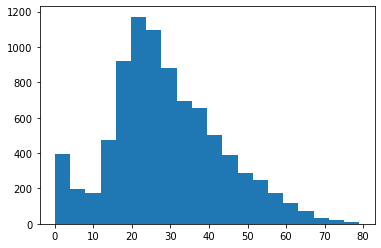

In [18]:
plt.hist(df_train["Age"],bins=20)


(array([178.,  78.,  82., 225., 494., 624., 573., 384., 376., 274., 248.,
        205., 141.,  96.,  84.,  61.,  35.,  12.,  12.,   4.]),
 array([ 0.  ,  3.95,  7.9 , 11.85, 15.8 , 19.75, 23.7 , 27.65, 31.6 ,
        35.55, 39.5 , 43.45, 47.4 , 51.35, 55.3 , 59.25, 63.2 , 67.15,
        71.1 , 75.05, 79.  ]),
 <BarContainer object of 20 artists>)

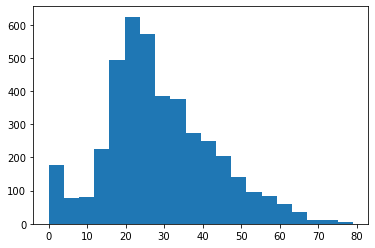

In [19]:
plt.hist(df_test['Age'],bins=20)

<AxesSubplot:xlabel='Transported', ylabel='Age'>

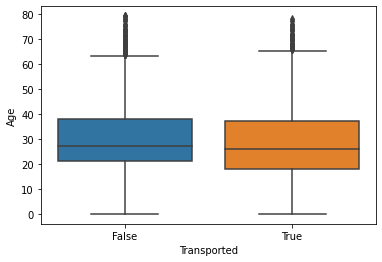

In [20]:
sns.boxplot(y='Age',x='Transported',data=df_train)

##### CryoSleep
1. distribution
mostly False
2. Cryo VS Transported
seems to have positive relationship with "transported"

Text(0.5, 1.0, 'Percent of data if slept')

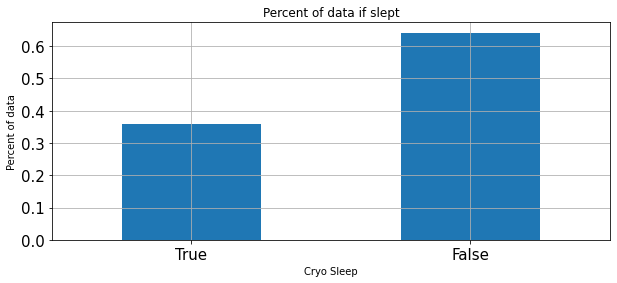

In [21]:
df_train['CryoSleep'].value_counts(normalize=True).sort_values().plot(kind='bar',figsize=(10,4),rot=0)
plt.xlabel("Cryo Sleep")
plt.ylabel("Percent of data")
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.title("Percent of data if slept")

Text(0.5, 1.0, 'Percent of data if slept')

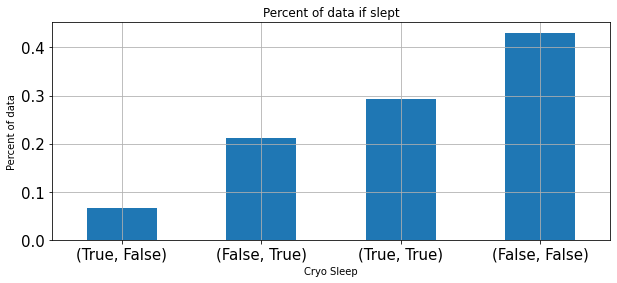

In [22]:
df_train[['CryoSleep','Transported']].value_counts(normalize=True).sort_values().plot(kind='bar',figsize=(10,4),rot=0)
plt.xlabel("Cryo Sleep")
plt.ylabel("Percent of data")
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.title("Percent of data if slept")

Text(0.5, 1.0, 'Percent of data if slept')

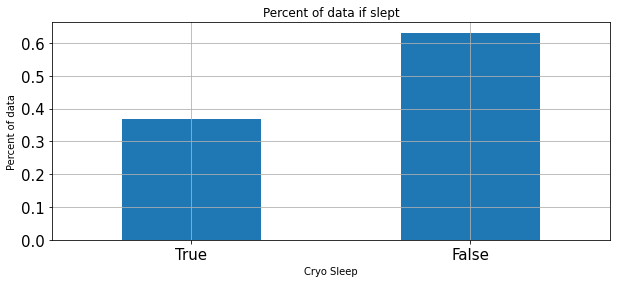

In [23]:
df_test['CryoSleep'].value_counts(normalize=True).sort_values().plot(kind='bar',figsize=(10,4),rot=0)
plt.xlabel("Cryo Sleep")
plt.ylabel("Percent of data")
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.title("Percent of data if slept")

Cryo and Transported (C,T): positive relationship???

##### VIP
1. distribution
Only a very small group of passenger has VIP
2. VIP vs Transported
Quite uniform within groups, no obvious relationship

Text(0.5, 1.0, 'Percent of data whether VIP or not')

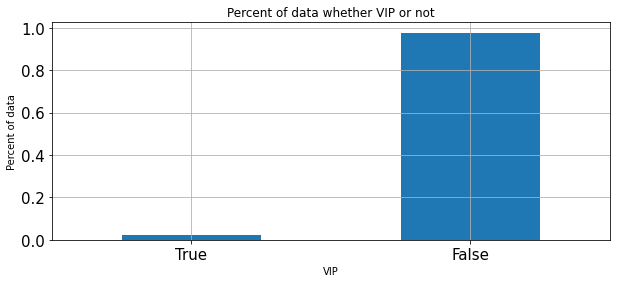

In [24]:
df_train['VIP'].value_counts(normalize=True).sort_values().plot(kind='bar',figsize=(10,4),rot=0)
plt.xlabel("VIP")
plt.ylabel("Percent of data")
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.title("Percent of data whether VIP or not")

Text(0.5, 1.0, 'Percent of data whether VIP or not')

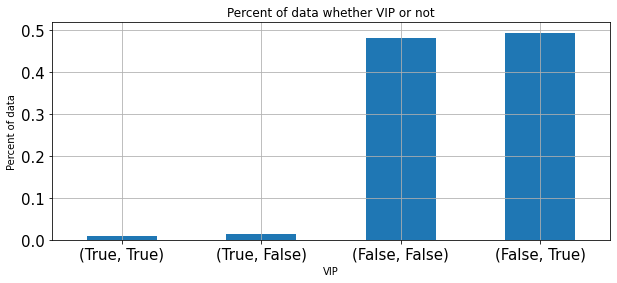

In [25]:
df_train[['VIP',"Transported"]].value_counts(normalize=True).sort_values().plot(kind='bar',figsize=(10,4),rot=0)
plt.xlabel("VIP")
plt.ylabel("Percent of data")
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.title("Percent of data whether VIP or not")

Text(0.5, 1.0, 'Percent of data whether VIP or not')

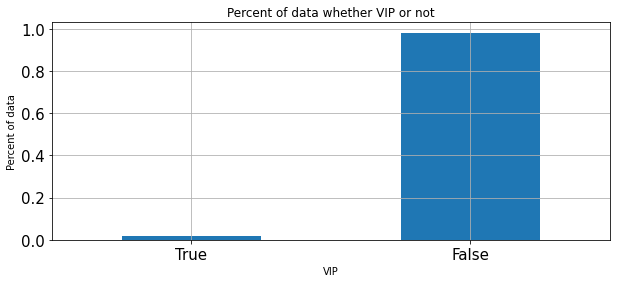

In [26]:
df_test['VIP'].value_counts(normalize=True).sort_values().plot(kind='bar',figsize=(10,4),rot=0)
plt.xlabel("VIP")
plt.ylabel("Percent of data")
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.title("Percent of data whether VIP or not")

##### Facilities
1. each distribution
mostly have no cost of facilities
2. against transported
shows that for food court and shopping mall, more transported passenger have high cost in facilities
for room service, spa and vrdeck, more untransported passenger have high cost 
3. Against VIP
VIP seems to have higher cost on facilities
4. heatmap correlation
food court and VRDeck / Spa: some correlation
Age and food court, Spa, VRDeck
Spa and VRDeck

(array([3.626e+03, 3.140e+02, 1.400e+02, 4.400e+01, 3.500e+01, 7.000e+00,
        1.300e+01, 4.000e+00, 5.000e+00, 2.000e+00, 2.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([    0.  ,   578.35,  1156.7 ,  1735.05,  2313.4 ,  2891.75,
         3470.1 ,  4048.45,  4626.8 ,  5205.15,  5783.5 ,  6361.85,
         6940.2 ,  7518.55,  8096.9 ,  8675.25,  9253.6 ,  9831.95,
        10410.3 , 10988.65, 11567.  ]),
 <BarContainer object of 20 artists>)

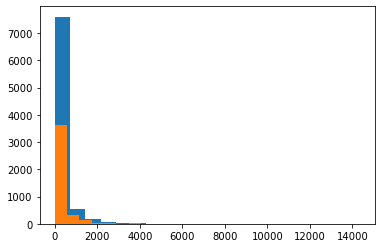

In [27]:
plt.hist(df_train['RoomService'],20)
plt.hist(df_test['RoomService'],20)

(array([3.811e+03, 1.530e+02, 8.100e+01, 3.500e+01, 2.400e+01, 2.500e+01,
        9.000e+00, 1.300e+01, 8.000e+00, 4.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00]),
 array([    0.  ,  1263.65,  2527.3 ,  3790.95,  5054.6 ,  6318.25,
         7581.9 ,  8845.55, 10109.2 , 11372.85, 12636.5 , 13900.15,
        15163.8 , 16427.45, 17691.1 , 18954.75, 20218.4 , 21482.05,
        22745.7 , 24009.35, 25273.  ]),
 <BarContainer object of 20 artists>)

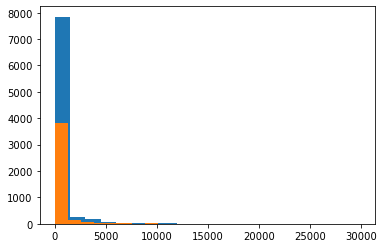

In [28]:
plt.hist(df_train['FoodCourt'],20)
plt.hist(df_test['FoodCourt'],20)

(array([3.631e+03, 2.550e+02, 1.470e+02, 5.700e+01, 1.900e+01, 2.700e+01,
        1.800e+01, 4.000e+00, 2.000e+00, 3.000e+00, 4.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 3.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 4.000e+00]),
 array([   0. ,  414.6,  829.2, 1243.8, 1658.4, 2073. , 2487.6, 2902.2,
        3316.8, 3731.4, 4146. , 4560.6, 4975.2, 5389.8, 5804.4, 6219. ,
        6633.6, 7048.2, 7462.8, 7877.4, 8292. ]),
 <BarContainer object of 20 artists>)

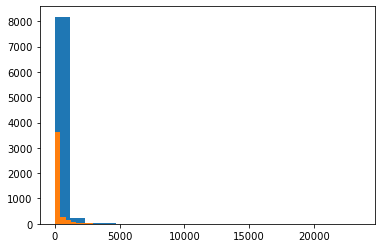

In [29]:
plt.hist(df_train['ShoppingMall'],20)
plt.hist(df_test['ShoppingMall'],20)

test set a little bit more concentrated at 0

(array([3.871e+03, 1.530e+02, 4.800e+01, 3.400e+01, 1.900e+01, 1.400e+01,
        1.200e+01, 7.000e+00, 4.000e+00, 2.000e+00, 2.000e+00, 1.000e+00,
        4.000e+00, 0.000e+00, 2.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([    0. ,   992.2,  1984.4,  2976.6,  3968.8,  4961. ,  5953.2,
         6945.4,  7937.6,  8929.8,  9922. , 10914.2, 11906.4, 12898.6,
        13890.8, 14883. , 15875.2, 16867.4, 17859.6, 18851.8, 19844. ]),
 <BarContainer object of 20 artists>)

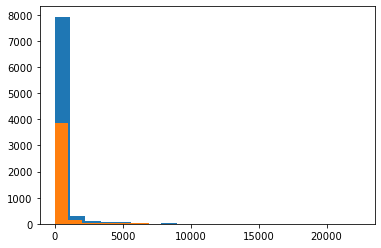

In [30]:
plt.hist(df_train['Spa'],20)
plt.hist(df_test['Spa'],20)

(array([3.916e+03, 1.330e+02, 6.100e+01, 2.200e+01, 1.500e+01, 1.800e+01,
        1.000e+01, 4.000e+00, 2.000e+00, 1.000e+00, 5.000e+00, 1.000e+00,
        1.000e+00, 3.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00]),
 array([    0. ,  1113.6,  2227.2,  3340.8,  4454.4,  5568. ,  6681.6,
         7795.2,  8908.8, 10022.4, 11136. , 12249.6, 13363.2, 14476.8,
        15590.4, 16704. , 17817.6, 18931.2, 20044.8, 21158.4, 22272. ]),
 <BarContainer object of 20 artists>)

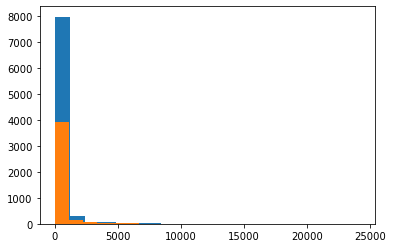

In [31]:
plt.hist(df_train['VRDeck'],20)
plt.hist(df_test['VRDeck'],20)

Room Service

<AxesSubplot:xlabel='Transported', ylabel='RoomService'>

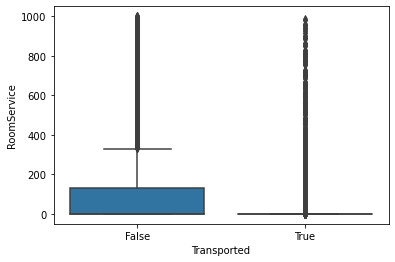

In [32]:
df = df_train[df_train['RoomService']<=1000]
sns.boxplot(x="Transported",y="RoomService",data=df)

<AxesSubplot:xlabel='VIP', ylabel='RoomService'>

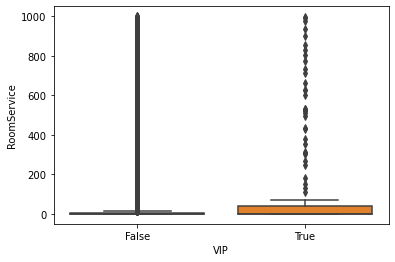

In [33]:
df = df_train[df_train['RoomService']<=1000]
sns.boxplot(x="VIP",y="RoomService",data=df)

<AxesSubplot:xlabel='HomePlanet', ylabel='RoomService'>

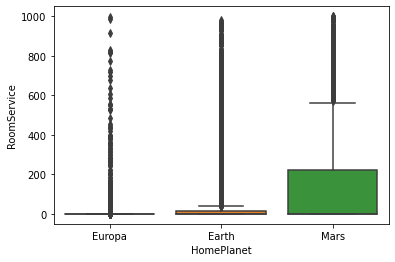

In [34]:
df = df_train[df_train['RoomService']<=1000]
sns.boxplot(x="HomePlanet",y="RoomService",data=df)

Food Court

<AxesSubplot:xlabel='Transported', ylabel='FoodCourt'>

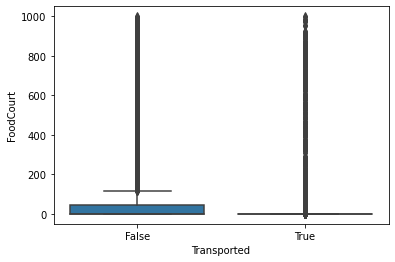

In [35]:
df = df_train[df_train['FoodCourt']<=1000]
sns.boxplot(x="Transported",y="FoodCourt",data=df)

<AxesSubplot:xlabel='VIP', ylabel='FoodCourt'>

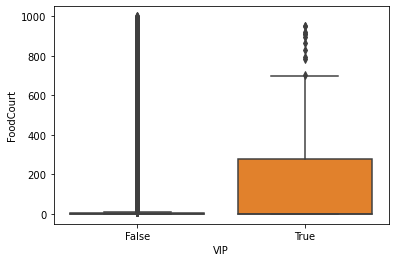

In [36]:
df = df_train[df_train['FoodCourt']<=1000]
sns.boxplot(x="VIP",y="FoodCourt",data=df)

<AxesSubplot:xlabel='HomePlanet', ylabel='FoodCourt'>

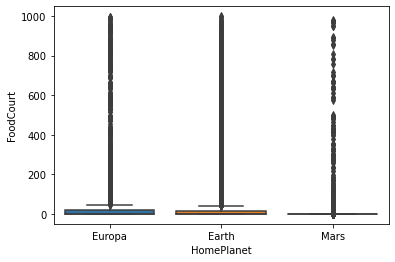

In [37]:
df = df_train[df_train['FoodCourt']<=1000]
sns.boxplot(x="HomePlanet",y="FoodCourt",data=df)

ShoppingMall

<AxesSubplot:xlabel='Transported', ylabel='ShoppingMall'>

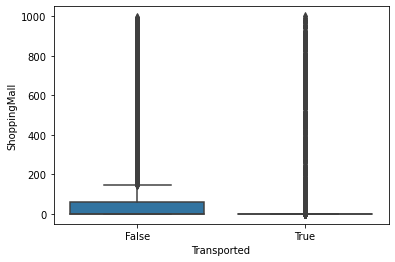

In [38]:
df = df_train[df_train['ShoppingMall']<=1000]
sns.boxplot(x="Transported",y="ShoppingMall",data=df)

<AxesSubplot:xlabel='VIP', ylabel='ShoppingMall'>

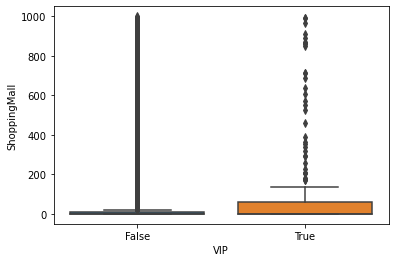

In [39]:
df = df_train[df_train['ShoppingMall']<=1000]
sns.boxplot(x="VIP",y="ShoppingMall",data=df)

<AxesSubplot:xlabel='HomePlanet', ylabel='ShoppingMall'>

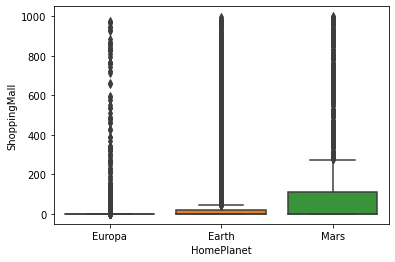

In [40]:
df = df_train[df_train['ShoppingMall']<=1000]
sns.boxplot(x="HomePlanet",y="ShoppingMall",data=df)

Spa

<AxesSubplot:xlabel='Transported', ylabel='Spa'>

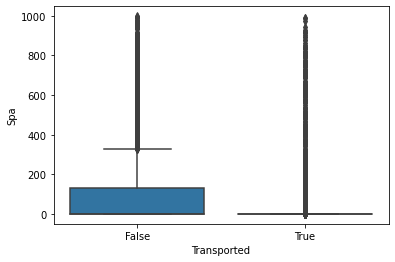

In [41]:
df = df_train[df_train['Spa']<=1000]
sns.boxplot(x="Transported",y="Spa",data=df)

<AxesSubplot:xlabel='VIP', ylabel='Spa'>

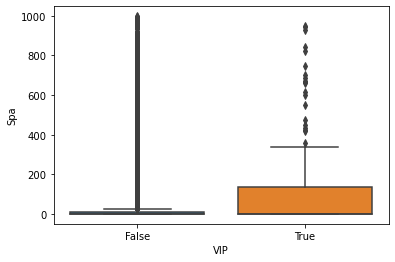

In [42]:
df = df_train[df_train['Spa']<=1000]
sns.boxplot(x="VIP",y="Spa",data=df)

<AxesSubplot:xlabel='HomePlanet', ylabel='Spa'>

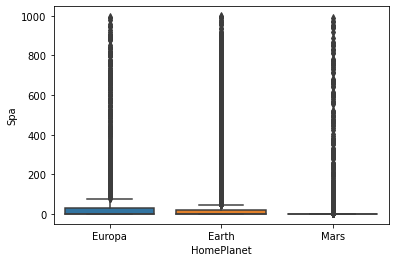

In [43]:
df = df_train[df_train['Spa']<=1000]
sns.boxplot(x="HomePlanet",y="Spa",data=df)

VR

<AxesSubplot:xlabel='Transported', ylabel='VRDeck'>

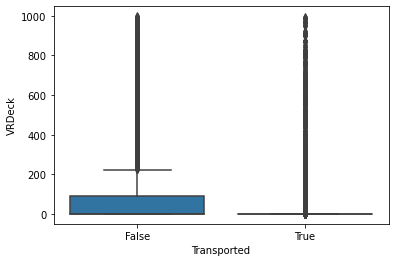

In [44]:
df = df_train[df_train['VRDeck']<=1000]
sns.boxplot(x="Transported",y="VRDeck",data=df)

<AxesSubplot:xlabel='VIP', ylabel='VRDeck'>

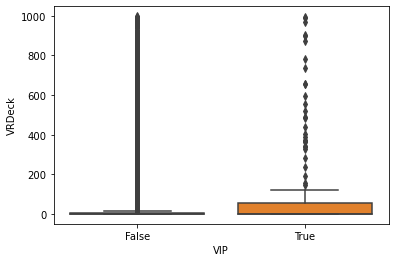

In [45]:
df = df_train[df_train['VRDeck']<=1000]
sns.boxplot(x="VIP",y="VRDeck",data=df)

<AxesSubplot:xlabel='HomePlanet', ylabel='VRDeck'>

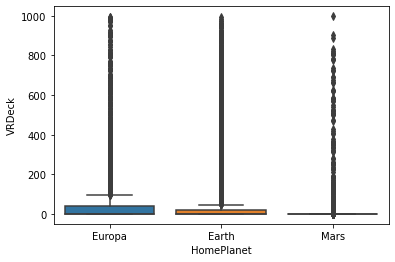

In [46]:
df = df_train[df_train['VRDeck']<=1000]
sns.boxplot(x="HomePlanet",y="VRDeck",data=df)

In [47]:
fig = px.histogram(df_train,x="RoomService",color="Transported")
fig.update_layout(title_text = 'Room service cost against Transported or not')
fig.show()

In [48]:
fig = px.histogram(df_train,x="FoodCourt",color="Transported")
fig.update_layout(title_text = 'Food Court cost against Transported or not')
fig.show()

In [49]:
fig = px.histogram(df_train,x="ShoppingMall",color="Transported")
fig.update_layout(title_text = 'ShoppingMall cost against Transported or not')
fig.show()

In [50]:
fig = px.histogram(df_train,x="Spa",color="Transported")
fig.update_layout(title_text = 'Spa cost against Transported or not')
fig.show()

In [51]:
fig = px.histogram(df_train,x="VRDeck",color="Transported")
fig.update_layout(title_text = 'VRDeck cost against Transported or not')
fig.show()

<AxesSubplot:>

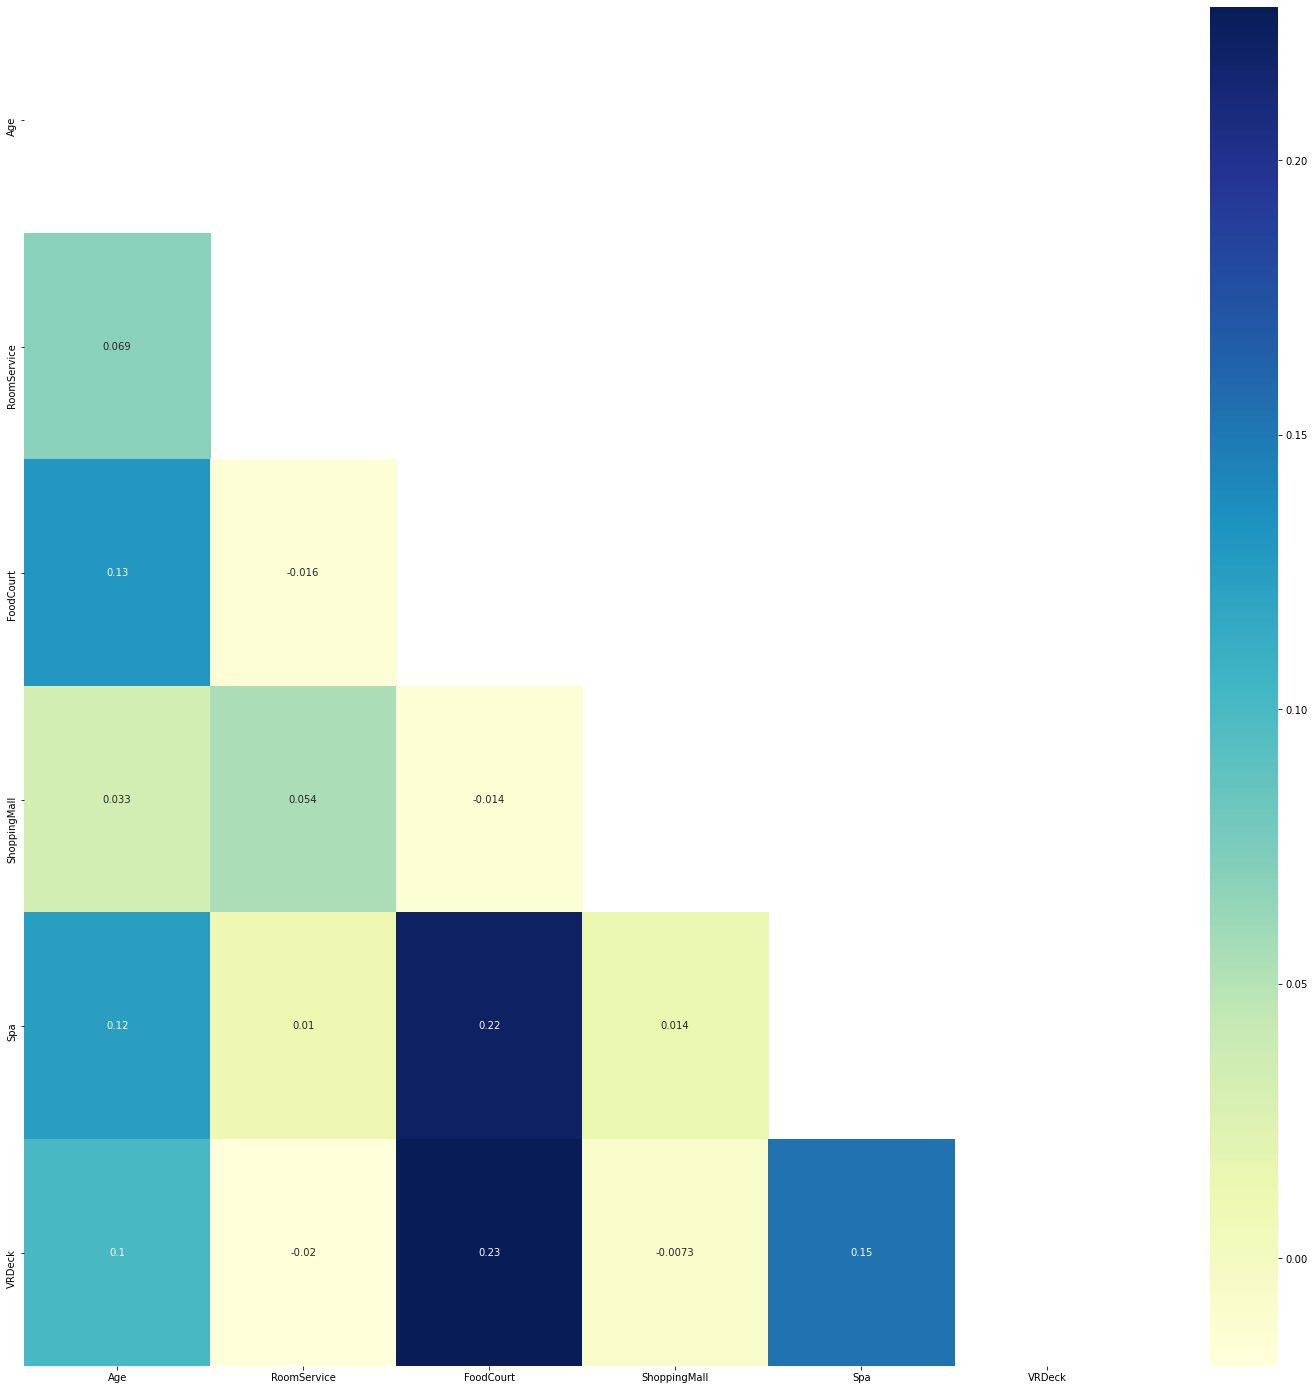

In [52]:
df = df_train[['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']]
plt.figure(figsize = (25,25))
mask = np.triu(np.ones_like(df.corr(),dtype=bool))
sns.heatmap(df.corr(),mask=mask,cmap="YlGnBu",annot=True)

<AxesSubplot:>

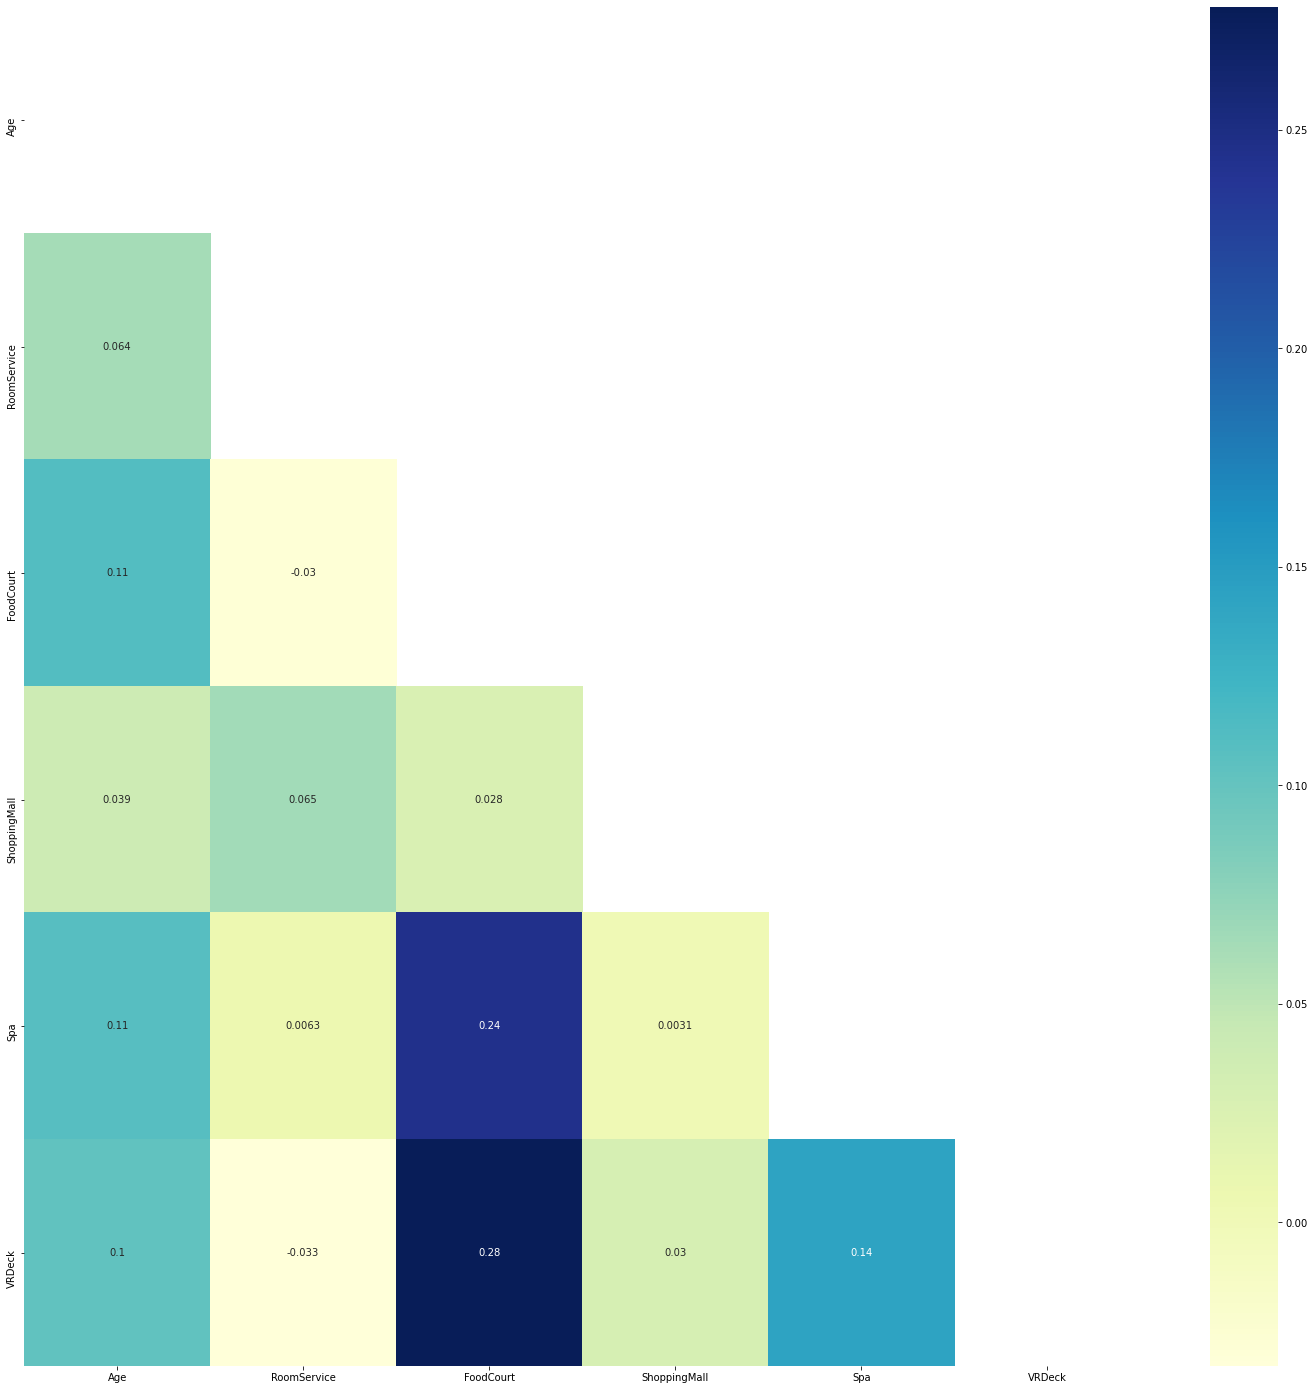

In [53]:
df = df_test[['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']]
plt.figure(figsize = (25,25))
mask = np.triu(np.ones_like(df.corr(),dtype=bool))
sns.heatmap(df.corr(),mask=mask,cmap="YlGnBu",annot=True)

##### Cabin
seperate and see if the side and deck matter

In [54]:
cabin = df_train['Cabin'].copy()
cabin=pd.DataFrame(cabin.str.split("/"))

In [55]:
cabin_info = cabin.Cabin.apply(pd.Series)

In [56]:
cabin_info.columns = ['deck','num','side']
cabin_info

deck   num side
0       B     0    P
1       F     0    S
2       A     0    S
3       A     0    S
4       F     1    S
...   ...   ...  ...
8688    A    98    P
8689    G  1499    S
8690    G  1500    S
8691    E   608    S
8692    E   608    S

[8693 rows x 3 columns]

In [57]:
print(cabin_info.deck.unique())
print(cabin_info.side.unique())

['B' 'F' 'A' 'G' nan 'E' 'D' 'C' 'T']
['P' 'S' nan]


In [58]:
df_train_updated = pd.concat([df_train,cabin_info],axis=1)
df_train_updated.head(3)

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck             Name  \
0          0.0        0.0           0.0     0.0     0.0  Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0     Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0    Altark Susent   

   Transported deck num side  
0        False    B   0    P  
1         True    F   0    S  
2        False    A   0    S

Text(0.5, 1.0, 'Percent of data belonging to each deck')

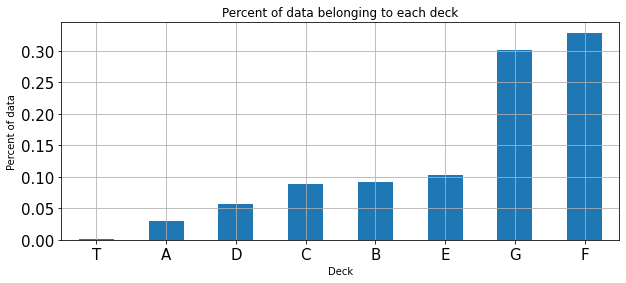

In [59]:
df_train_updated['deck'].value_counts(normalize=True).sort_values().plot(kind='bar',figsize=(10,4),rot=0)
plt.xlabel("Deck")
plt.ylabel("Percent of data")
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.title("Percent of data belonging to each deck")

Text(0.5, 1.0, 'Percent of data belonging to each side')

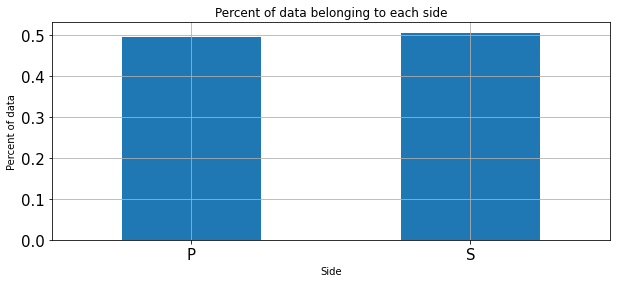

In [60]:
df_train_updated['side'].value_counts(normalize=True).sort_values().plot(kind='bar',figsize=(10,4),rot=0)
plt.xlabel("Side")
plt.ylabel("Percent of data")
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.title("Percent of data belonging to each side")

Text(0.5, 1.0, 'Percent of data belonging to each side')

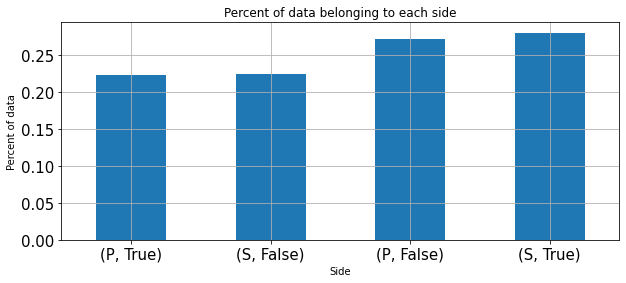

In [61]:
df_train_updated[['side','Transported']].value_counts(normalize=True).sort_values().plot(kind='bar',figsize=(10,4),rot=0)
plt.xlabel("Side")
plt.ylabel("Percent of data")
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.title("Percent of data belonging to each side")

Passengers in S is more likely to be transported

(array([2384., 1647.,  878.,  656.,  619.,  646.,  587.,  570.,  280.,
         227.]),
 array([   0. ,  189.4,  378.8,  568.2,  757.6,  947. , 1136.4, 1325.8,
        1515.2, 1704.6, 1894. ]),
 <BarContainer object of 10 artists>)

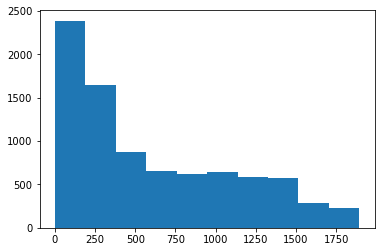

In [62]:
df_train_updated['num']=pd.to_numeric(df_train_updated['num'])
plt.hist(df_train_updated['num'])

In [63]:
from pandas_profiling import ProfileReport


In [64]:
profile = ProfileReport(df_train,title="Post Block Assignment 3",
                        dataset={"description": "This profiling report was generated for Carl Kirstein",
                                 "copyright_holder": "Carl Kirstein",
                                 "copyright_year": "2022",
                                },
                        explorative=True,
                       )
profile

Render HTML: 100%|██████████| 1/1 [00:01<00:00,  1.56s/it]
